In [49]:
# Adopted by Xintong Chen
# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve


In [50]:
import pandas as pd
cb_software_reddit = pd.read_csv("cb_reddit",sep='\t')

In [51]:
cb_software_reddit.loc[cb_software_reddit['status'] == 'acquired', 'outcome'] = 'Success'
cb_software_reddit.loc[cb_software_reddit['status'] == 'ipo', 'outcome'] = 'Success'

cb_software_reddit.loc[cb_software_reddit['status'] == 'closed', 'outcome'] = 'Not_Success'
cb_software_reddit.loc[cb_software_reddit['status'] == 'operating', 'outcome'] = 'Not_Success'

In [52]:
from sklearn import preprocessing
for column in cb_software_reddit.columns:
    if cb_software_reddit[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        cb_software_reddit[column] = le.fit_transform(cb_software_reddit[column].astype(str))

In [53]:
cb_software_reddit.head()
X = cb_software_reddit.drop(['outcome','status'],axis=1)
y = cb_software_reddit['outcome']


In [54]:
cb_software_reddit.outcome.value_counts()

0    1485
1     299
Name: outcome, dtype: int64

In [56]:
y.shape

(1784,)

In [57]:
test_index= []
import random
for x in range(178):
    test_index.append(random.randint(0,1783))
    
#test = X[test_index
val_X = X.iloc[test_index,:]
val_y = y.iloc[test_index,]

In [60]:
val_X.shape

(178, 10)

In [61]:
X = X.drop(test_index)
y = y.drop(test_index)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)


In [63]:
X_train.head()

,Unnamed: 0,permalink,company_name,funding_total_usd,state_code,city,funding_rounds,num_investers,num_reddit,sentiment_reddit
1712,1712,1712,1646,458,3,39,4,15,0,2
1064,1064,1059,1018,660,3,326,2,10,0,2
560,560,559,542,723,37,297,1,1,0,2
1058,1058,1052,1013,176,44,302,1,9,0,2
1562,1562,1558,1509,281,3,326,2,10,4,1


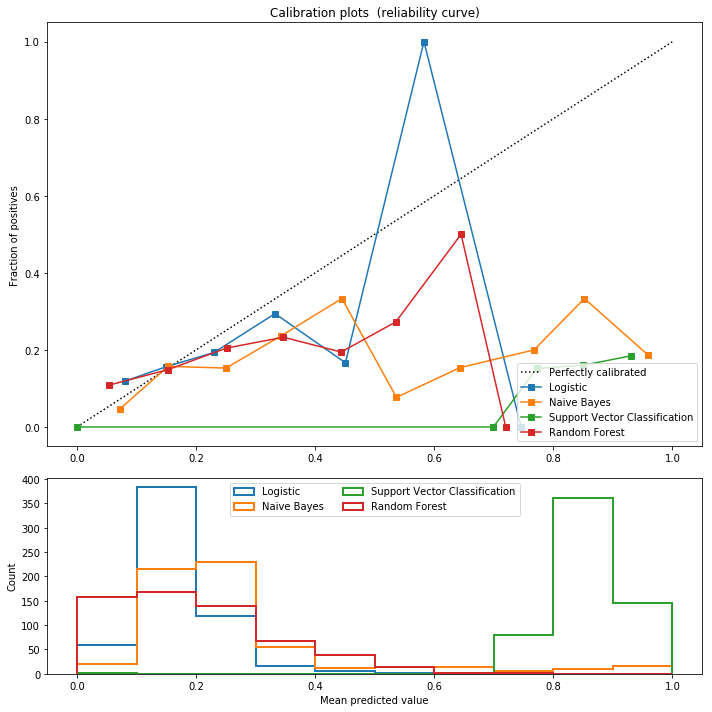

In [17]:
#train_samples = 100  # Samples used for training the models

#X_train = X[:train_samples]
#X_test = X[train_samples:]
#y_train = y[:train_samples]
#y_test = y[train_samples:]

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

plot accuracy

/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

LR: 0.755002 (0.032955)
LDA: 0.755804 (0.033172)
KNN: 0.755234 (0.031279)


/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


CART: 0.723062 (0.025943)
NB: 0.642182 (0.135643)


/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xintongchen/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.

SVM: 0.754032 (0.035545)
RF: 0.751372 (0.040115)


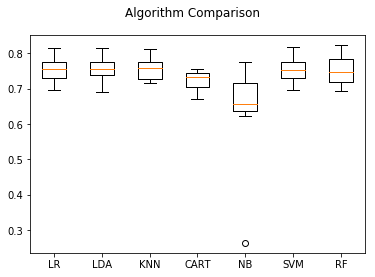

In [65]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# prepare configuration for cross validation test harness
seed = 66
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:

for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [29]:
import pandas as pd
cb_software_reddit = pd.read_csv("cb_reddit",sep='\t')
cb_software_reddit[np.isfinite(cb_software_reddit['sentiment_reddit'])]

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [33]:
cb_software_reddit.dropna().head()

,Unnamed: 0,permalink,company_name,funding_total_usd,status,state_code,city,funding_rounds,num_investers,num_reddit,sentiment_reddit
13,13,/company/7-billion-people,7 Billion People,7952804,operating,TX,Austin,4,1,73,Negative
15,15,/company/a-la-mobile,A la Mobile,7550000,operating,KS,San Ramon,2,1,7,Negative
19,19,/company/accept-software,Accept Software,25305000,acquired,CA,Santa Clara,4,4,33,Positive
20,20,/company/accruit,Accruit,3315000,operating,CO,Denver,1,1,5,Negative
25,25,/company/achieve-x,Achieve X,150000,operating,PA,Conshohocken,1,1,15,Positive
